In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Train dataset
train_data = pd.read_csv('train/train.csv')
train_data

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0
...,...,...,...,...,...
78364,128587,8,71,1523,0
78365,128589,30,547,937,0
78366,128590,8,754,1004,0
78367,128592,13,134,71,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 78369 non-null  int64
 1   campaign_id        78369 non-null  int64
 2   coupon_id          78369 non-null  int64
 3   customer_id        78369 non-null  int64
 4   redemption_status  78369 non-null  int64
dtypes: int64(5)
memory usage: 3.0 MB


In [5]:
# test data
test_data = pd.read_csv('test.csv')
test_data

,id,campaign_id,coupon_id,customer_id
0,3,22,869,967
1,4,20,389,1566
2,5,22,981,510
3,8,25,1069,361
4,10,17,498,811
...,...,...,...,...
50221,128584,20,843,501
50222,128588,25,415,481
50223,128591,25,596,1336
50224,128593,22,518,748


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50226 entries, 0 to 50225
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           50226 non-null  int64
 1   campaign_id  50226 non-null  int64
 2   coupon_id    50226 non-null  int64
 3   customer_id  50226 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


In [7]:
# Customer Transaction Dataset
customer_transaction_data = pd.read_csv('train/customer_transaction_data.csv')
customer_transaction_data

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0
...,...,...,...,...,...,...,...
1324561,2013-06-30,1129,2777,1,284.60,-71.24,0.0
1324562,2013-06-30,1129,2953,4,42.74,-28.50,0.0
1324563,2013-06-30,1129,2971,6,64.12,-42.74,0.0
1324564,2013-06-30,1129,46984,1,95.82,0.00,0.0


In [8]:
customer_transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324566 entries, 0 to 1324565
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   date             1324566 non-null  object 
 1   customer_id      1324566 non-null  int64  
 2   item_id          1324566 non-null  int64  
 3   quantity         1324566 non-null  int64  
 4   selling_price    1324566 non-null  float64
 5   other_discount   1324566 non-null  float64
 6   coupon_discount  1324566 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 70.7+ MB


In [9]:
customer_transaction_data = customer_transaction_data.sample(n=5000)

In [10]:
customer_transaction_data = customer_transaction_data.drop(['date','item_id'],axis=1)
customer_transaction_data

,customer_id,quantity,selling_price,other_discount,coupon_discount
35773,1291,1,63.76,-7.12,0.0
879972,1239,2,118.97,-143.90,0.0
331040,1555,1,61.27,-6.06,0.0
280163,816,1,35.62,-10.33,0.0
1010494,14,1,59.49,-7.84,0.0
...,...,...,...,...,...
629105,744,1,95.82,0.00,0.0
1117535,1022,1,81.57,0.00,0.0
1228717,501,1,44.52,-12.47,0.0
723626,1092,1,213.36,0.00,0.0


In [11]:
# Merge train_data and customer_transaction_data
train_transaction_data = pd.merge(train_data, customer_transaction_data, left_on = 'customer_id', right_on = 'customer_id')
train_transaction_data

,id,campaign_id,coupon_id,customer_id,redemption_status,quantity,selling_price,other_discount,coupon_discount
0,2,13,116,48,0,1,897.27,0.00,0.0
1,2,13,116,48,0,2,35.62,0.00,0.0
2,6959,13,992,48,0,1,897.27,0.00,0.0
3,6959,13,992,48,0,2,35.62,0.00,0.0
4,8549,13,150,48,0,1,897.27,0.00,0.0
...,...,...,...,...,...,...,...,...,...
308826,114906,26,947,507,0,1,106.50,0.00,0.0
308827,118711,26,2,507,0,1,142.48,-24.58,0.0
308828,118711,26,2,507,0,1,106.50,0.00,0.0
308829,128256,26,629,507,0,1,142.48,-24.58,0.0


In [12]:
test_transaction_data = pd.merge(test_data, customer_transaction_data, left_on = 'customer_id', right_on = 'customer_id')
test_transaction_data

,id,campaign_id,coupon_id,customer_id,quantity,selling_price,other_discount,coupon_discount
0,3,22,869,967,1,63.76,0.00,0.0
1,3,22,869,967,2,95.11,-18.17,0.0
2,3,22,869,967,1,89.05,-31.70,0.0
3,4382,18,717,967,1,63.76,0.00,0.0
4,4382,18,717,967,2,95.11,-18.17,0.0
...,...,...,...,...,...,...,...,...
231454,69055,24,43,1286,1,213.36,-35.62,0.0
231455,69055,24,43,1286,1,18.88,0.00,0.0
231456,69055,24,43,1286,1,56.64,0.00,0.0
231457,69055,24,43,1286,1,35.62,-3.21,0.0


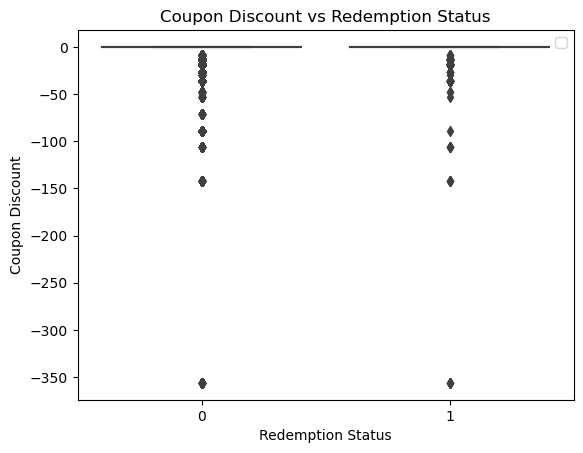

In [13]:
sns.boxplot(x='redemption_status', y='coupon_discount', data=train_transaction_data)
plt.xlabel('Redemption Status')
plt.ylabel('Coupon Discount')
plt.title('Coupon Discount vs Redemption Status')
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Unredeemed', 'Redeemed']
plt.legend(handles, labels)
plt.show()

In [14]:
# Customer Demographics dataset"
customer_demographics_data = pd.read_csv('train/customer_demographics.csv')
customer_demographics_data

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5
...,...,...,...,...,...,...,...
755,1577,36-45,NaN,0,2,NaN,5
756,1578,46-55,Married,0,3,1,6
757,1579,46-55,NaN,0,1,NaN,4
758,1580,26-35,NaN,0,2,NaN,5


In [15]:
customer_demographics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  431 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    object
 5   no_of_children  222 non-null    object
 6   income_bracket  760 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


In [16]:
train_transaction_demographic_data = pd.merge(train_transaction_data, customer_demographics_data, left_on='customer_id', right_on = 'customer_id')
train_transaction_demographic_data

,id,campaign_id,coupon_id,customer_id,redemption_status,quantity,selling_price,other_discount,coupon_discount,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,2,13,116,48,0,1,897.27,0.00,0.0,36-45,Married,0,2,NaN,3
1,2,13,116,48,0,2,35.62,0.00,0.0,36-45,Married,0,2,NaN,3
2,6959,13,992,48,0,1,897.27,0.00,0.0,36-45,Married,0,2,NaN,3
3,6959,13,992,48,0,2,35.62,0.00,0.0,36-45,Married,0,2,NaN,3
4,8549,13,150,48,0,1,897.27,0.00,0.0,36-45,Married,0,2,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200933,114906,26,947,507,0,1,106.50,0.00,0.0,70+,Married,0,2,NaN,6
200934,118711,26,2,507,0,1,142.48,-24.58,0.0,70+,Married,0,2,NaN,6
200935,118711,26,2,507,0,1,106.50,0.00,0.0,70+,Married,0,2,NaN,6
200936,128256,26,629,507,0,1,142.48,-24.58,0.0,70+,Married,0,2,NaN,6


In [17]:
test_transaction_demographic_data = pd.merge(test_transaction_data, customer_demographics_data, left_on = 'customer_id', right_on = 'customer_id')
test_transaction_demographic_data

,id,campaign_id,coupon_id,customer_id,quantity,selling_price,other_discount,coupon_discount,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,3,22,869,967,1,63.76,0.00,0.0,36-45,NaN,0,1,NaN,5
1,3,22,869,967,2,95.11,-18.17,0.0,36-45,NaN,0,1,NaN,5
2,3,22,869,967,1,89.05,-31.70,0.0,36-45,NaN,0,1,NaN,5
3,4382,18,717,967,1,63.76,0.00,0.0,36-45,NaN,0,1,NaN,5
4,4382,18,717,967,2,95.11,-18.17,0.0,36-45,NaN,0,1,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161335,42343,24,43,1424,1,106.50,-71.24,0.0,46-55,Married,0,4,2,5
161336,42343,24,43,1424,1,70.88,-7.12,0.0,46-55,Married,0,4,2,5
161337,123403,24,42,1424,2,178.10,-141.77,0.0,46-55,Married,0,4,2,5
161338,123403,24,42,1424,1,106.50,-71.24,0.0,46-55,Married,0,4,2,5


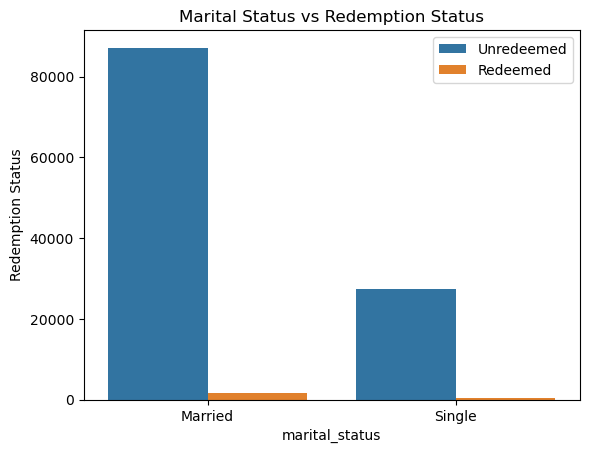

In [18]:
sns.countplot(x='marital_status', hue='redemption_status', data=train_transaction_demographic_data)
plt.xlabel('marital_status')
plt.ylabel('Redemption Status')
plt.title('Marital Status vs Redemption Status')

handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Unredeemed', 'Redeemed']
plt.legend(handles, labels)
plt.show()

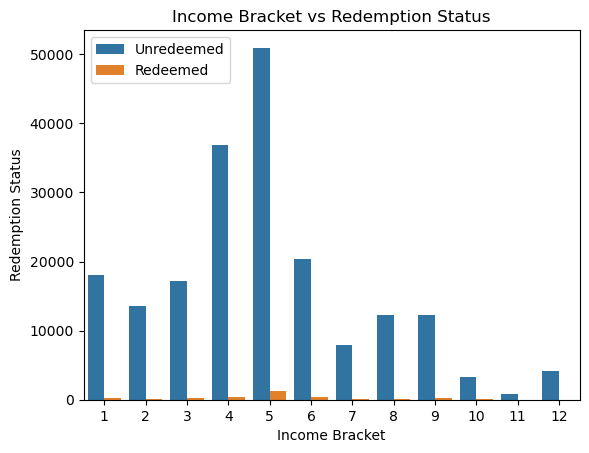

In [19]:
sns.countplot(x='income_bracket', hue='redemption_status', data=train_transaction_demographic_data)
plt.xlabel('Income Bracket')
plt.ylabel('Redemption Status')
plt.title('Income Bracket vs Redemption Status')

handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Unredeemed', 'Redeemed']
plt.legend(handles, labels)
plt.show()

In [20]:
# Campaign dataset
campaign_data = pd.read_csv('train/campaign_data.csv')
campaign_data

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13
5,22,X,16/09/13,18/10/13
6,18,X,10/08/13,04/10/13
7,19,Y,26/08/13,27/09/13
8,17,Y,29/07/13,30/08/13
9,16,Y,15/07/13,16/08/13


In [21]:
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    28 non-null     int64 
 1   campaign_type  28 non-null     object
 2   start_date     28 non-null     object
 3   end_date       28 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.0+ KB


In [22]:
# Selecting only 2 columns 
campaign_data = campaign_data[['campaign_id', 'campaign_type']]
campaign_data

,campaign_id,campaign_type
0,24,Y
1,25,Y
2,20,Y
3,23,Y
4,21,Y
5,22,X
6,18,X
7,19,Y
8,17,Y
9,16,Y


In [23]:
train_data = pd.merge(train_transaction_demographic_data, campaign_data, left_on = 'campaign_id', right_on = 'campaign_id')
train_data

,id,campaign_id,coupon_id,customer_id,redemption_status,quantity,selling_price,other_discount,coupon_discount,age_range,marital_status,rented,family_size,no_of_children,income_bracket,campaign_type
0,2,13,116,48,0,1,897.27,0.0,0.0,36-45,Married,0,2,NaN,3,X
1,2,13,116,48,0,2,35.62,0.0,0.0,36-45,Married,0,2,NaN,3,X
2,6959,13,992,48,0,1,897.27,0.0,0.0,36-45,Married,0,2,NaN,3,X
3,6959,13,992,48,0,2,35.62,0.0,0.0,36-45,Married,0,2,NaN,3,X
4,8549,13,150,48,0,1,897.27,0.0,0.0,36-45,Married,0,2,NaN,3,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200933,124083,27,728,1378,0,1,156.37,0.0,0.0,26-35,NaN,0,4,2,8,Y
200934,124083,27,728,1378,0,1,177.03,0.0,0.0,26-35,NaN,0,4,2,8,Y
200935,124083,27,728,1378,0,1,59.13,-26.0,0.0,26-35,NaN,0,4,2,8,Y
200936,124083,27,728,1378,0,1,49.51,0.0,0.0,26-35,NaN,0,4,2,8,Y


In [24]:
test_data = pd.merge(test_transaction_demographic_data, campaign_data, left_on = 'campaign_id', right_on = 'campaign_id')
test_data

,id,campaign_id,coupon_id,customer_id,quantity,selling_price,other_discount,coupon_discount,age_range,marital_status,rented,family_size,no_of_children,income_bracket,campaign_type
0,3,22,869,967,1,63.76,0.00,0.0,36-45,NaN,0,1,NaN,5,X
1,3,22,869,967,2,95.11,-18.17,0.0,36-45,NaN,0,1,NaN,5,X
2,3,22,869,967,1,89.05,-31.70,0.0,36-45,NaN,0,1,NaN,5,X
3,26710,22,492,967,1,63.76,0.00,0.0,36-45,NaN,0,1,NaN,5,X
4,26710,22,492,967,2,95.11,-18.17,0.0,36-45,NaN,0,1,NaN,5,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161335,42343,24,43,1424,1,106.50,-71.24,0.0,46-55,Married,0,4,2,5,Y
161336,42343,24,43,1424,1,70.88,-7.12,0.0,46-55,Married,0,4,2,5,Y
161337,123403,24,42,1424,2,178.10,-141.77,0.0,46-55,Married,0,4,2,5,Y
161338,123403,24,42,1424,1,106.50,-71.24,0.0,46-55,Married,0,4,2,5,Y


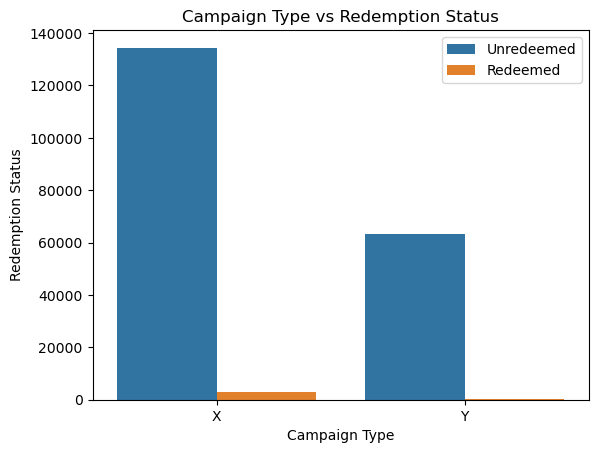

In [25]:
sns.countplot(x='campaign_type', hue='redemption_status', data=train_data)
plt.xlabel('Campaign Type')
plt.ylabel('Redemption Status')
plt.title('Campaign Type vs Redemption Status')
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Unredeemed', 'Redeemed']
plt.legend(handles, labels)
plt.show()

In [26]:
# Coupon Item mapping dataset
coupon_mapping_data = pd.read_csv('train/coupon_item_mapping.csv')
coupon_mapping_data

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77
...,...,...
92658,32,69268
92659,32,68502
92660,32,68612
92661,33,71390


In [27]:
coupon_mapping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92663 entries, 0 to 92662
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   coupon_id  92663 non-null  int64
 1   item_id    92663 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB


In [28]:
# Item dataset
item_data = pd.read_csv('train/item_data.csv')
item_data

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery
...,...,...,...,...
74061,74062,5490,Established,Pharmaceutical
74062,74063,5497,Established,Pharmaceutical
74063,74064,5497,Established,Pharmaceutical
74064,74065,5520,Established,Pharmaceutical


In [29]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_id     74066 non-null  int64 
 1   brand       74066 non-null  int64 
 2   brand_type  74066 non-null  object
 3   category    74066 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [30]:
# Merging coupon mapping and item datasets
coupon_item_data = pd.merge(coupon_mapping_data, item_data, left_on = 'item_id', right_on = 'item_id')
coupon_item_data

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,Local,Grocery
1,6,37,56,Local,Grocery
2,22,37,56,Local,Grocery
3,31,37,56,Local,Grocery
4,107,75,56,Local,Grocery
...,...,...,...,...,...
92658,33,68764,3867,Established,Meat
92659,29,74013,5383,Established,Miscellaneous
92660,29,71965,4554,Established,Miscellaneous
92661,29,67815,4985,Established,Flowers & Plants


In [31]:

# selecting only few variables
#coupon_item_data = coupon_item_data[['coupon_id', 'brand']]
coupon_item_data = coupon_item_data.sample(n=50000)
coupon_item_data

,coupon_id,item_id,brand,brand_type,category
18983,286,51080,17,Established,Pharmaceutical
37237,8,29951,2650,Established,Meat
5744,9,14376,1308,Established,Grocery
37845,24,9751,3029,Established,Meat
40245,33,72062,2011,Established,Packaged Meat
...,...,...,...,...,...
79134,23,36003,2053,Established,Pharmaceutical
16908,468,45080,172,Established,Grocery
27574,299,15610,56,Local,Seafood
81469,32,46024,5174,Established,Pharmaceutical


In [32]:
train_data = train_data.sample(n=40000)
train_data = pd.merge(train_data, coupon_item_data, left_on = 'coupon_id', right_on = 'coupon_id')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1746152 entries, 0 to 1746151
Data columns (total 20 columns):
 #   Column             Dtype  
---  ------             -----  
 0   id                 int64  
 1   campaign_id        int64  
 2   coupon_id          int64  
 3   customer_id        int64  
 4   redemption_status  int64  
 5   quantity           int64  
 6   selling_price      float64
 7   other_discount     float64
 8   coupon_discount    float64
 9   age_range          object 
 10  marital_status     object 
 11  rented             int64  
 12  family_size        object 
 13  no_of_children     object 
 14  income_bracket     int64  
 15  campaign_type      object 
 16  item_id            int64  
 17  brand              int64  
 18  brand_type         object 
 19  category           object 
dtypes: float64(3), int64(10), object(7)
memory usage: 279.8+ MB


In [33]:
test_data = test_data.sample(n=40000)
test_data = pd.merge(test_data, coupon_item_data, left_on = 'coupon_id', right_on = 'coupon_id')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2346961 entries, 0 to 2346960
Data columns (total 19 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   campaign_id      int64  
 2   coupon_id        int64  
 3   customer_id      int64  
 4   quantity         int64  
 5   selling_price    float64
 6   other_discount   float64
 7   coupon_discount  float64
 8   age_range        object 
 9   marital_status   object 
 10  rented           int64  
 11  family_size      object 
 12  no_of_children   object 
 13  income_bracket   int64  
 14  campaign_type    object 
 15  item_id          int64  
 16  brand            int64  
 17  brand_type       object 
 18  category         object 
dtypes: float64(3), int64(9), object(7)
memory usage: 358.1+ MB


In [34]:
train_data = train_data.sample(n=500000)

In [36]:
test_data = test_data.sample(n=500000)

In [37]:


train_data=pd.get_dummies(train_data)
test_data=pd.get_dummies(test_data)
final_train,final_test=train_data.align(test_data,join='inner',axis=1)

In [38]:
final_train.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'quantity',
       'selling_price', 'other_discount', 'coupon_discount', 'rented',
       'income_bracket', 'item_id', 'brand', 'age_range_18-25',
       'age_range_26-35', 'age_range_36-45', 'age_range_46-55',
       'age_range_56-70', 'age_range_70+', 'marital_status_Married',
       'marital_status_Single', 'family_size_1', 'family_size_2',
       'family_size_3', 'family_size_4', 'family_size_5+', 'no_of_children_1',
       'no_of_children_2', 'no_of_children_3+', 'campaign_type_X',
       'campaign_type_Y', 'brand_type_Established', 'brand_type_Local',
       'category_Bakery', 'category_Dairy, Juices & Snacks',
       'category_Flowers & Plants', 'category_Garden', 'category_Grocery',
       'category_Meat', 'category_Miscellaneous', 'category_Natural Products',
       'category_Packaged Meat', 'category_Pharmaceutical',
       'category_Prepared Food', 'category_Salads', 'category_Seafood',
       'category_Skin & Hair Care

In [39]:
final_test.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'quantity',
       'selling_price', 'other_discount', 'coupon_discount', 'rented',
       'income_bracket', 'item_id', 'brand', 'age_range_18-25',
       'age_range_26-35', 'age_range_36-45', 'age_range_46-55',
       'age_range_56-70', 'age_range_70+', 'marital_status_Married',
       'marital_status_Single', 'family_size_1', 'family_size_2',
       'family_size_3', 'family_size_4', 'family_size_5+', 'no_of_children_1',
       'no_of_children_2', 'no_of_children_3+', 'campaign_type_X',
       'campaign_type_Y', 'brand_type_Established', 'brand_type_Local',
       'category_Bakery', 'category_Dairy, Juices & Snacks',
       'category_Flowers & Plants', 'category_Garden', 'category_Grocery',
       'category_Meat', 'category_Miscellaneous', 'category_Natural Products',
       'category_Packaged Meat', 'category_Pharmaceutical',
       'category_Prepared Food', 'category_Salads', 'category_Seafood',
       'category_Skin & Hair Care

In [248]:
'''from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X=final_train[['id', 'campaign_id', 'coupon_id', 'customer_id', 'quantity',
       'selling_price', 'other_discount', 'coupon_discount', 'rented',
       'income_bracket', 'item_id', 'brand', 'age_range_18-25',
       'age_range_26-35', 'age_range_36-45', 'age_range_46-55',
       'age_range_56-70', 'age_range_70+', 'marital_status_Married',
       'marital_status_Single', 'family_size_1', 'family_size_2',
       'family_size_3', 'family_size_4', 'family_size_5+', 'no_of_children_1',
       'no_of_children_2', 'no_of_children_3+', 'campaign_type_X',
       'campaign_type_Y', 'brand_type_Established', 'brand_type_Local',
       'category_Bakery', 'category_Dairy, Juices & Snacks',
       'category_Flowers & Plants', 'category_Garden', 'category_Grocery',
       'category_Meat', 'category_Miscellaneous', 'category_Natural Products',
       'category_Packaged Meat', 'category_Pharmaceutical',
       'category_Prepared Food', 'category_Salads', 'category_Seafood',
       'category_Skin & Hair Care', 'category_Travel',
       'category_Vegetables (cut)']]
y=train_data['redemption_status']

model=RandomForestClassifier(n_estimators=6).fit(X,y)

cv_scores=cross_val_score(model,X,y,cv=10)

print('cross validation scores:',cv_scores,'\n','mean of cross validation scores:',np.mean(cv_scores))
'''

cross validation scores: [nan nan nan nan nan nan nan nan nan nan] 
 mean of cross validation scores: nan


C:\Users\deepi\AnacondaDistribution\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\deepi\AnacondaDistribution\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\deepi\AnacondaDistribution\lib\site-packages\sklearn\ensemble\_forest.py", line 327, in fit
    X, y = self._validate_data(
  File "C:\Users\deepi\AnacondaDistribution\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_param

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


X=final_train[['id', 'campaign_id', 'coupon_id', 'customer_id', 'quantity',
       'selling_price', 'other_discount', 'coupon_discount', 'rented',
       'income_bracket', 'item_id', 'brand', 'age_range_18-25',
       'age_range_26-35', 'age_range_36-45', 'age_range_46-55',
       'age_range_56-70', 'age_range_70+', 'marital_status_Married',
       'marital_status_Single', 'family_size_1', 'family_size_2',
       'family_size_3', 'family_size_4', 'family_size_5+', 'no_of_children_1',
       'no_of_children_2', 'no_of_children_3+', 'campaign_type_X',
       'campaign_type_Y', 'brand_type_Established', 'brand_type_Local',
       'category_Bakery', 'category_Dairy, Juices & Snacks',
       'category_Flowers & Plants', 'category_Garden', 'category_Grocery',
       'category_Meat', 'category_Miscellaneous', 'category_Natural Products',
       'category_Packaged Meat', 'category_Pharmaceutical',
       'category_Prepared Food', 'category_Salads', 'category_Seafood',
       'category_Skin & Hair Care', 'category_Travel',
       'category_Vegetables (cut)']]
y=train_data['redemption_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Train an SVM classifier with a linear kernel
clf = SVC(kernel='linear')

clf.fit(X, y)
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


#cv_scores=cross_val_score(clf,X,y,cv=10)

#print('cross validation scores:',cv_scores,'\n','mean of cross validation scores:',np.mean(cv_scores))

<AxesSubplot:>

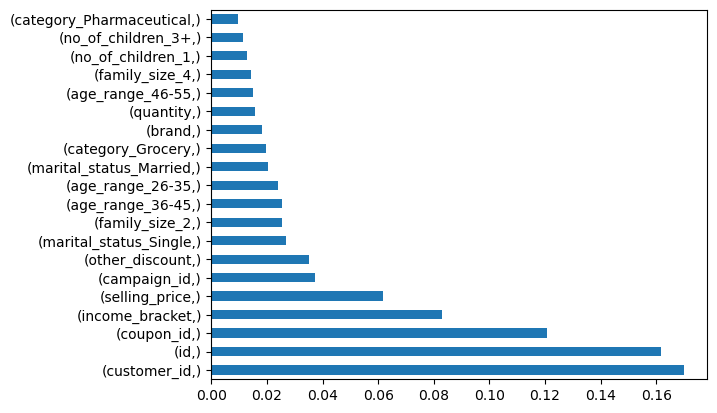

In [122]:
'''feature_imp=pd.Series(model.feature_importances_, index = [['id', 'campaign_id', 'coupon_id', 'customer_id', 'quantity',
       'selling_price', 'other_discount', 'coupon_discount', 'rented',
       'income_bracket', 'item_id', 'brand', 'age_range_18-25',
       'age_range_26-35', 'age_range_36-45', 'age_range_46-55',
       'age_range_56-70', 'age_range_70+', 'marital_status_Married',
       'marital_status_Single', 'family_size_1', 'family_size_2',
       'family_size_3', 'family_size_4', 'family_size_5+', 'no_of_children_1',
       'no_of_children_2', 'no_of_children_3+', 'campaign_type_X',
       'campaign_type_Y', 'brand_type_Established', 'brand_type_Local',
       'category_Bakery', 'category_Dairy, Juices & Snacks',
       'category_Flowers & Plants', 'category_Garden', 'category_Grocery',
       'category_Meat', 'category_Miscellaneous', 'category_Natural Products',
       'category_Packaged Meat', 'category_Pharmaceutical',
       'category_Prepared Food', 'category_Salads', 'category_Seafood',
       'category_Skin & Hair Care', 'category_Travel',
       'category_Vegetables (cut)']])

feature_imp.nlargest(20).plot(kind='barh')
'''

In [123]:

# feature_imp.T

id                                 0.161598
campaign_id                        0.037253
coupon_id                          0.120854
customer_id                        0.169952
quantity                           0.015598
selling_price                      0.061782
other_discount                     0.035006
coupon_discount                    0.009194
rented                             0.002694
income_bracket                     0.082815
item_id                            0.002796
brand                              0.018037
age_range_18-25                    0.004039
age_range_26-35                    0.023996
age_range_36-45                    0.025240
age_range_46-55                    0.014894
age_range_56-70                    0.005347
age_range_70+                      0.005027
marital_status_Married             0.020463
marital_status_Single              0.026967
family_size_1                      0.008498
family_size_2                      0.025544
family_size_3                   

In [124]:

prediction=clf.predict(test_data[['id', 'campaign_id', 'coupon_id', 'customer_id', 'quantity',
       'selling_price', 'other_discount', 'coupon_discount', 'rented',
       'income_bracket', 'item_id', 'brand', 'age_range_18-25',
       'age_range_26-35', 'age_range_36-45', 'age_range_46-55',
       'age_range_56-70', 'age_range_70+', 'marital_status_Married',
       'marital_status_Single', 'family_size_1', 'family_size_2',
       'family_size_3', 'family_size_4', 'family_size_5+', 'no_of_children_1',
       'no_of_children_2', 'no_of_children_3+', 'campaign_type_X',
       'campaign_type_Y', 'brand_type_Established', 'brand_type_Local',
       'category_Bakery', 'category_Dairy, Juices & Snacks',
       'category_Flowers & Plants', 'category_Garden', 'category_Grocery',
       'category_Meat', 'category_Miscellaneous', 'category_Natural Products',
       'category_Packaged Meat', 'category_Pharmaceutical',
       'category_Prepared Food', 'category_Salads', 'category_Seafood',
       'category_Skin & Hair Care', 'category_Travel',
       'category_Vegetables (cut)']])
       

In [ ]:
'''test_data = test_data[['id', 'coupon_id', 'customer_id', 'income_bracket', 'selling_price', 'campaign_id', 'other_discount', 'age_range_36-45', 'marital_status_Single', 'category_Grocery', 'family_size_4', 'age_range_46-55', 'marital_status_Married', 'family_size_2', 'brand', 'age_range_26-35', 'age_range_56-70', 'family_size_1', 'quantity', 'no_of_children_1']]
test_data'''

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4612778 entries, 0 to 4612777
Data columns (total 48 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   id                               int64  
 1   campaign_id                      int64  
 2   coupon_id                        int64  
 3   customer_id                      int64  
 4   quantity                         int64  
 5   selling_price                    float64
 6   other_discount                   float64
 7   coupon_discount                  float64
 8   rented                           int64  
 9   income_bracket                   int64  
 10  item_id                          int64  
 11  brand                            int64  
 12  age_range_18-25                  uint8  
 13  age_range_26-35                  uint8  
 14  age_range_36-45                  uint8  
 15  age_range_46-55                  uint8  
 16  age_range_56-70                  uint8  
 17  age_rang

In [77]:
'''
# Keeping only important features
train_data = train_data[['id', 'coupon_id', 'customer_id', 'income_bracket', 'selling_price', 'campaign_id', 'other_discount', 'age_range_36-45', 'marital_status_Single', 'category_Grocery', 'family_size_4', 'age_range_46-55', 'marital_status_Married', 'family_size_2', 'brand', 'age_range_26-35', 'age_range_56-70', 'family_size_1', 'quantity', 'no_of_children_1']]
train_data
'''

,id,coupon_id,customer_id,income_bracket,selling_price,campaign_id,other_discount,age_range_36-45,marital_status_Single,category_Grocery,family_size_4,age_range_46-55,marital_status_Married,family_size_2,brand,age_range_26-35,age_range_56-70,family_size_1,quantity,no_of_children_1
0,77271,737,802,2,142.48,8,-113.27,0,0,0,0,1,0,0,796,0,0,1,2,0
1,77271,737,802,2,142.48,8,-113.27,0,0,0,0,1,0,0,796,0,0,1,2,0
2,77271,737,802,2,142.48,8,-113.27,0,0,0,0,1,0,0,796,0,0,1,2,0
3,77271,737,802,2,142.48,8,-113.27,0,0,0,0,1,0,0,796,0,0,1,2,0
4,51272,737,186,4,71.24,8,-43.46,0,0,0,0,0,0,1,796,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4554120,126935,1088,1469,12,106.50,27,0.00,0,0,0,0,1,0,1,2088,0,0,0,1,0
4554121,126935,1088,1469,12,106.50,27,0.00,0,0,0,0,1,0,1,2088,0,0,0,1,0
4554122,126935,1088,1469,12,106.50,27,0.00,0,0,0,0,1,0,1,2088,0,0,0,1,0
4554123,126935,1088,1469,12,106.50,27,0.00,0,0,0,0,1,0,1,2088,0,0,0,1,0


In [125]:
# Coupon Redemption Predictions
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [126]:
print('Redeem:',sum([1 for i in prediction if i==1]),'\nNot Redeem:',sum([1 for i in prediction if i==0]))

Redeem: 9042 
Not Redeem: 2253114
